# Eletromag - Etapa 1 - Projeto WPT

### Import bibliotecas

In [1]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Parâmetros adotados

In [3]:
r1 = 0.5
r2 = 0.5
rc = 10
l1 = 300e-6
l2 = 300e-6
c1 = 0.1e-6
c2 = 0.1e-6
k = 0.5

### Cálculo da Frequência de Ressonância LC

In [4]:
w = 1/sqrt(l1*c1)
Fr = w/(2*pi)

In [5]:
print(f'Frequência de Ressonância: {abs(Fr)} Hz')

Frequência de Ressonância: 29057.584156627367 Hz


### Cálculos fasoriais

In [6]:
m = k*sqrt(l1*l2)
xl1 = 1j*w*l1
xl2 = 1j*w*l2
xc1 = 1/(1j*w*c1)
xc2 = 1/(1j*w*c2)
xm = 1j*w*m

### Cálculos do transformador

In [7]:
def CalcularTransformador(v1, rc):
    Z2 = ((1/(1j*w*c2)) * rc) / ((1/(1j*w*c2)) + rc)
    Z=np.array([[r1+xl1+xc1, -xm],[-xm, xl2+r2+Z2]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

### Cálculos do nosso circuito

In [8]:
v1 = 5
i1, i2 = CalcularTransformador(v1, rc)
v1ef = v1/sqrt(2)
i1ef = i1/sqrt(2)
v2 = i2 * rc
v2ef = v2/sqrt(2)
i2ef = i2/sqrt(2)
s2 = v2ef * i2ef.conjugate()

print(f'Corrente i1: {abs(i1)} A')
print(f'Corrente i2: {abs(i2)} A')
print(f'V2: {abs(v2)} V')
print(f'S2: {abs(s2)} W')

Corrente i1: 0.35717935383128696 A
Corrente i2: 0.18123218014140932 A
V2: 1.8123218014140934 V
S2: 0.1642255155940412 W


# Gráficos

## Dados das correntes

In [9]:
# Resetando parâmetros
r1 = 0.5
r2 = 0.5
rc = 10
l1 = 300e-6
l2 = 300e-6
c1 = 0.1e-6
c2 = 0.1e-6

# Lista de valores de K
k_list = np.arange(0,1,0.1)

# Lista de valores de frequência
f_list = np.arange(2.5e4, 5e4, 50)

# Lista de listas de correntes
i1_list_list = []
i2_list_list = []

# Main loop do K
for k in k_list:
    
    # Lista de correntes
    i1_list = []
    i2_list = []
    
    # Loop intermediário para gerar cada valor de listas de corrente
    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2 = CalcularTransformador(v1, rc)

        i1_list.append(round(i1.real, 3))
        i2_list.append(round(i2.real, 3))
    
    i1_list_list.append(i1_list)
    i2_list_list.append(i2_list)
    

## Gráfico de i1 x F por K

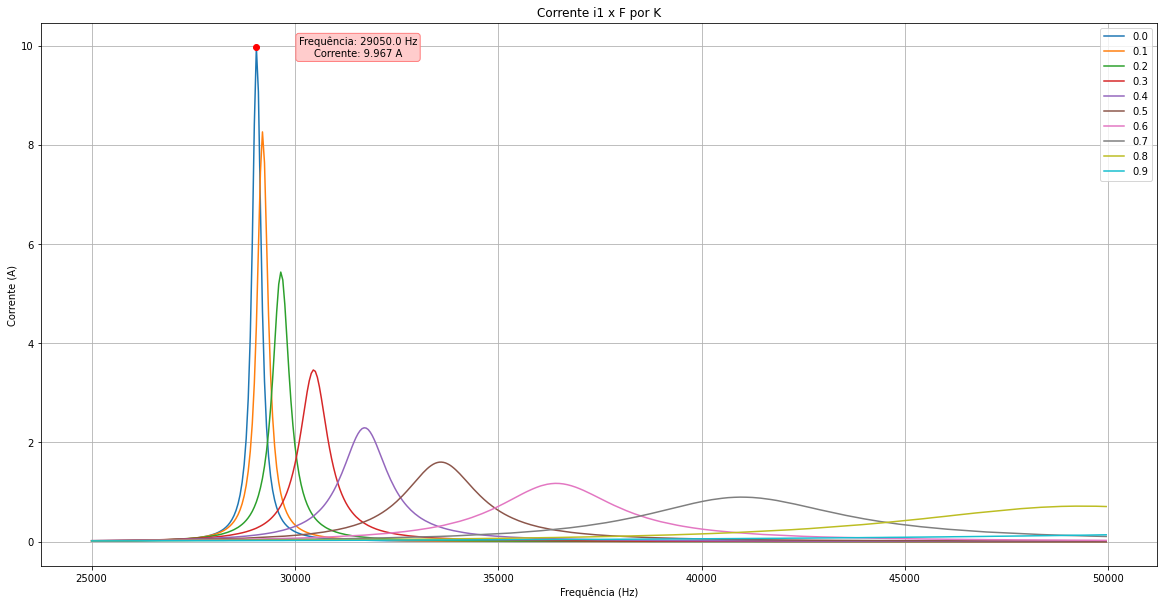

In [10]:

# Criando figura
fig = plt.figure(figsize=(20,10))

# Corrente i1 máxima e seu par de frequência
i1_max = 0
f_i1_max = 0

# Plotando cada uma das lista de correntes
for i in range(len(i1_list_list)):
    plt.plot(f_list, i1_list_list[i], label=f"{round(k_list[i],1)}")
    
    # Encontrando qual o valor máximo dentre todas as correntes (ponto vermelho)
    lista = i1_list_list[i]
    i_max = max(lista)
    index_i_max = lista.index(i_max)
    
    if i_max > i1_max:
        i1_max = i_max
        f_i1_max = f_list[index_i_max]    

# Plot do valor máximo encontrado (ponto vermelho)
plt.plot(f_i1_max, i1_max, "ro")

# Textbox ao lado do ponto vermelho
plt.text(f_i1_max + 2500, i1_max, f"Frequência: {f_i1_max} Hz\nCorrente: {i1_max} A", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))    

# Propriedades do gráfico
plt.title('Corrente i1 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")    
    
plt.show() 

## Gráfico de i2 x F por K

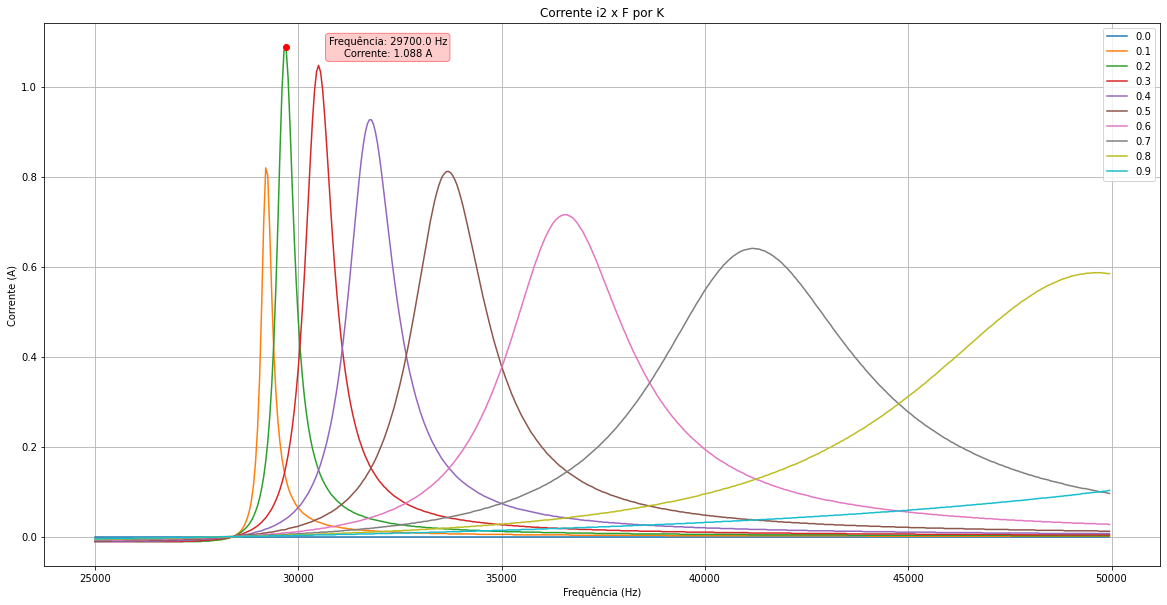

In [11]:

# Criando figura
fig = plt.figure(figsize=(20,10))

# Corrente i2 máxima e seu par de frequência
i2_max = 0
f_i2_max = 0

# Plotando cada uma das lista de correntes
for i in range(len(i2_list_list)):
    plt.plot(f_list, i2_list_list[i], label=f"{round(k_list[i],1)}")
    
    # Encontrando qual o valor máximo dentre todas as correntes (ponto vermelho)
    lista = i2_list_list[i]
    i_max = max(lista)
    index_i_max = lista.index(i_max)
    
    if i_max > i2_max:
        i2_max = i_max
        f_i2_max = f_list[index_i_max]    

# Plot do valor máximo encontrado (ponto vermelho)
plt.plot(f_i2_max, i2_max, "ro")

# Textbox ao lado do ponto vermelho
plt.text(f_i2_max + 2500, i2_max, f"Frequência: {f_i2_max} Hz\nCorrente: {i2_max} A", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))    

# Propriedade do gráfico
plt.title('Corrente i2 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")    
    
plt.show() 

## Dados das potências

In [12]:
# Lista com valores de K
k_list = np.arange(0,1,0.1)

# Lista de listas dos valores de potência de entrada e saída
s1_list_list = []
s2_list_list = []

# Main loop do K
for k in k_list:
    
    # Lista de potências
    s1_list = []
    s2_list = []
    
    # Lista de frequências
    f_list = np.arange(2.5e4, 5e4, 10)
    
    # Loop intermediário para gerar as listas com as potências
    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2 = CalcularTransformador(v1, rc)
        v1ef = v1/sqrt(2)
        i1ef = i1/sqrt(2)
        v2 = i2 * rc
        v2ef = v2/sqrt(2)
        i2ef = i2/sqrt(2)
        s1 = v1ef * i1ef.conjugate()
        s2 = v2ef * i2ef.conjugate()

        s1_list.append(round(s1.real,3))
        s2_list.append(round(s2.real,3))
        
    s1_list_list.append(s1_list)
    s2_list_list.append(s2_list)

## Gráfico de P1 X F por K

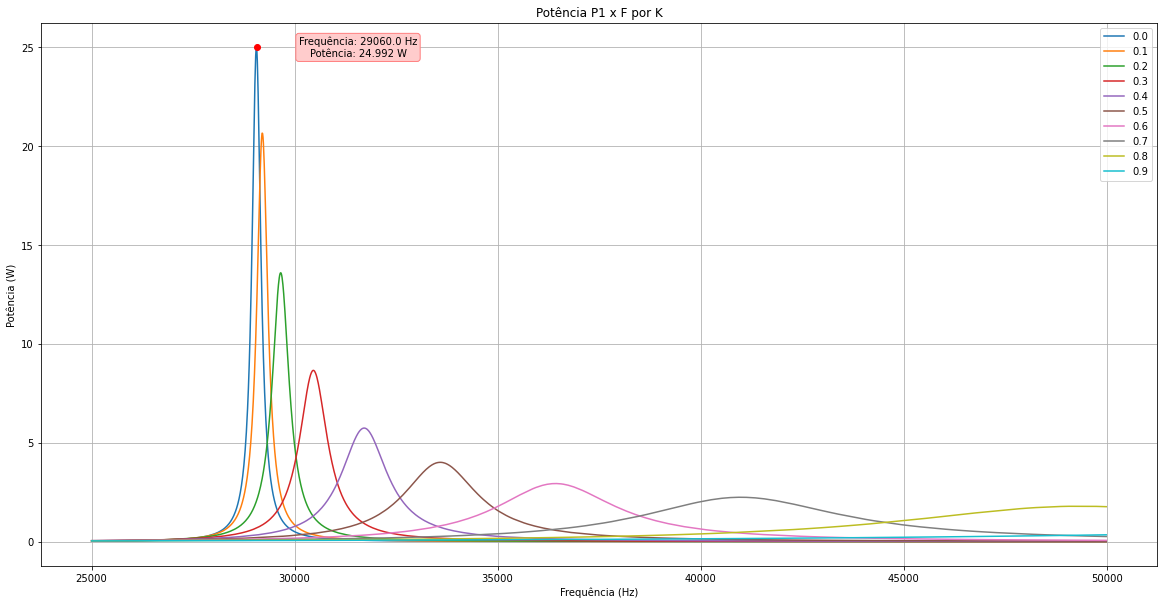

In [13]:

# Criando figura
fig = plt.figure(figsize=(20,10))

# Potência de entrada máxima e seu par de frequência
p1_max = 0
f_p1_max = 0

# Plotando cada uma das lista de potências
for i in range(len(s1_list_list)):
    plt.plot(f_list, s1_list_list[i], label=f"{round(k_list[i],1)}")
    
    # Encontrando qual o valor máximo dentre todas as potências (ponto vermelho)
    lista = s1_list_list[i]
    p_max = max(lista)
    index_p_max = lista.index(p_max)
    
    if p_max > p1_max:
        p1_max = p_max
        f_p1_max = f_list[index_p_max]

# Plot do valor máximo encontrado (ponto vermelho)
plt.plot(f_p1_max, p1_max, "ro")

# Textbox ao lado do ponto vermelho
plt.text(f_p1_max + 2500, p1_max, f"Frequência: {f_p1_max} Hz\nPotência: {p1_max} W", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

# Propriedades do gráfico
plt.title('Potência P1 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")

plt.show()

## Gráfico de P2 x F por K

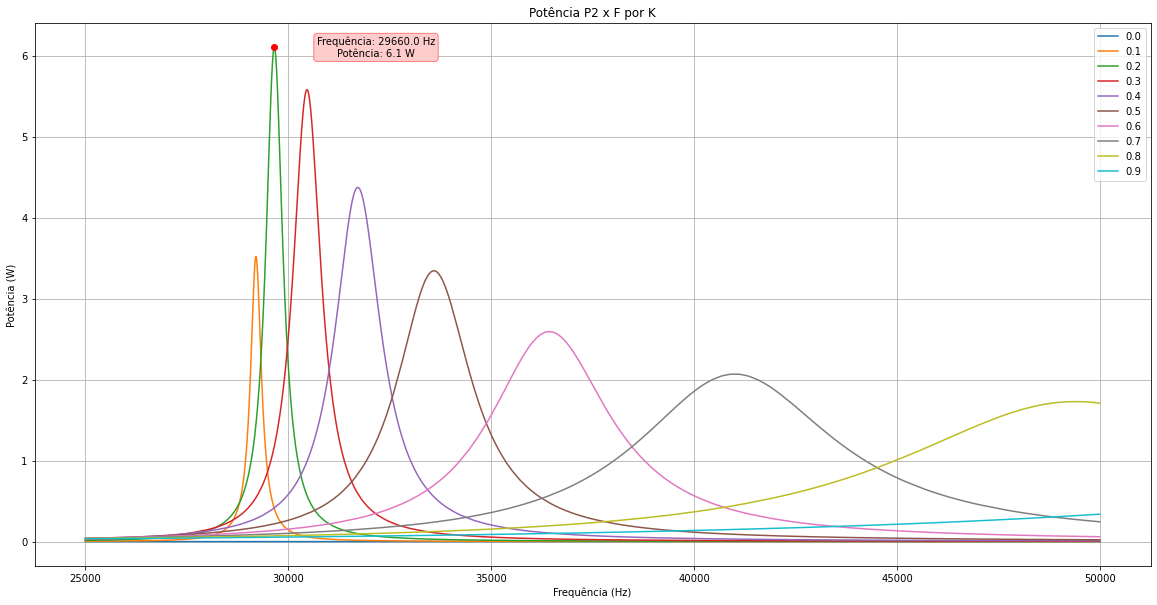

In [14]:

# Criando figura
fig = plt.figure(figsize=(20,10))

# Potência de saída máxima e seu par de frequência
p2_max = 0
f_p2_max = 0

# Plotando cada uma das lista de potências
for i in range(len(s2_list_list)):
    plt.plot(f_list, s2_list_list[i], label=f"{round(k_list[i],1)}")
    
    # Encontrando qual o valor máximo dentre todas as potências (ponto vermelho)
    lista = s2_list_list[i]
    p_max = max(lista)
    index_p_max = lista.index(p_max)
    
    if p_max > p2_max:
        p2_max = p_max
        f_p2_max = f_list[index_p_max]

# Plot do valor máximo encontrado (ponto vermelho)
plt.plot(f_p2_max, p2_max, "ro")

# Textbox ao lado do ponto vermelho
plt.text(f_p2_max + 2500, p2_max, f"Frequência: {f_p2_max} Hz\nPotência: {p2_max} W", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

# Propriedades do gráfico
plt.title('Potência P2 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")

plt.show()

## Dados de eficiência

In [15]:

# Resetando valores
r1 = 0.5
r2 = 0.5
rc = 10
l1 = 300e-6
l2 = 300e-6
c1 = 0.1e-6
c2 = 0.1e-6
k = 0.5

# Lista de Ks
k_list = np.arange(0,1,0.1)

# Lista das listas de eficiência
ef_list_list = []

# Main loop do K
for k in k_list:
    
    # Lista de eficiências
    ef_list = []
    
    # Lista de frequências
    f_list = np.arange(1, 5e4, 100)
    
    # Loop intermediário de cálculo das eficiências
    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2 = CalcularTransformador(v1, rc)
        v1ef = v1/sqrt(2)
        i1ef = i1/sqrt(2)
        v2 = i2 * rc
        v2ef = v2/sqrt(2)
        i2ef = i2/sqrt(2)
        s1 = v1ef * i1ef.conjugate()
        s2 = v2ef * i2ef.conjugate()

        ef_list.append(s2.real/s1.real)
        
    ef_list_list.append(ef_list)

## Gráfico de Eficiência x F por K

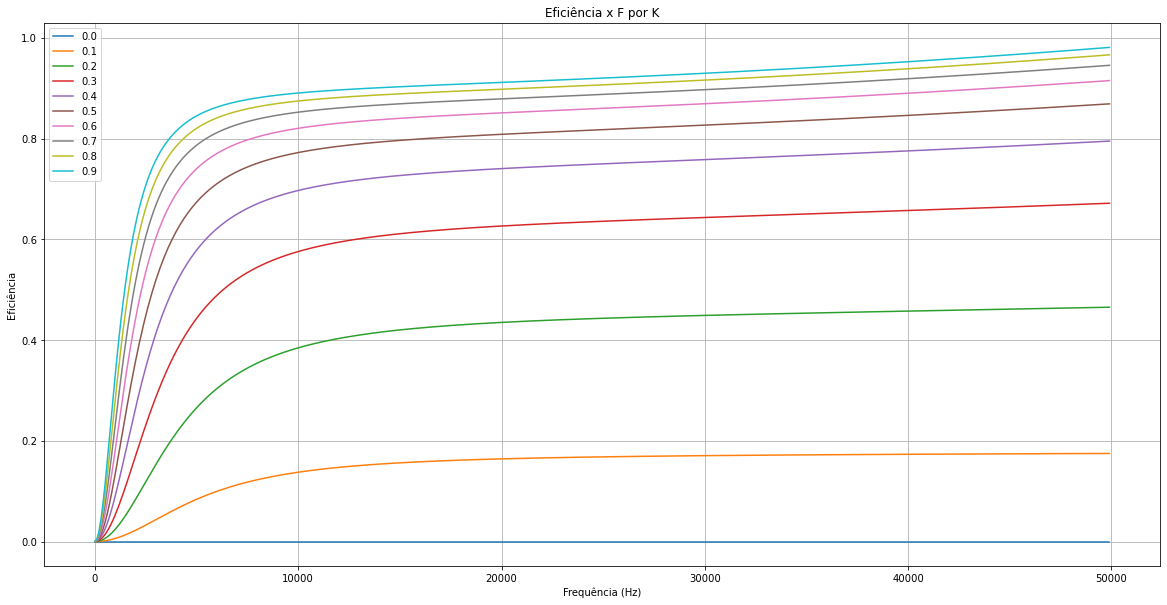

In [16]:

# Criando figura
fig = plt.figure(figsize=(20,10))

# Plotando cada uma das listas de eficiência
for i in range(len(ef_list_list)):
    plt.plot(f_list, ef_list_list[i], label=f"{round(k_list[i],1)}")

# Propriedade do gráfico
plt.title('Eficiência x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Eficiência")

plt.show()

## Dados do gráfico 3D de F x K x S2

In [17]:
# Lista de Ks
k_list = np.arange(0,1,0.01)

# Listas com as potências, frequências e Ks
s1_max_list = []
f_s1_list = []
k_s1_list = []

s2_max_list = []
f_s2_list = []
k_s2_list = []

# Main loop de K
for k in k_list:
    
    # Dicionário de potências
    s1_dic = {}
    s2_dic = {}
    
    # Lista de frequências
    f_list = np.arange(2.5e4, 5e4, 10)
    
    # Loop intermediário para calcular valores
    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2 = CalcularTransformador(v1, rc)
        v1ef = v1/sqrt(2)
        i1ef = i1/sqrt(2)
        v2 = i2 * rc
        v2ef = v2/sqrt(2)
        i2ef = i2/sqrt(2)
        s1 = v1ef * i1ef.conjugate()
        s2 = v2ef * i2ef.conjugate()

        s1_dic[f] = s1.real
        s2_dic[f] = s2.real
    
    # Encontrando valores máximos para fazer marcação (ponto vermelho)
    f_s1_list.append(max(s1_dic, key=s1_dic.get))
    s1_max_list.append(max(s1_dic.values()))
    k_s1_list.append(k)
    
    f_s2_list.append(max(s2_dic, key=s2_dic.get))
    s2_max_list.append(max(s2_dic.values()))
    k_s2_list.append(k)


## Gráfico 3D de F x K x S2

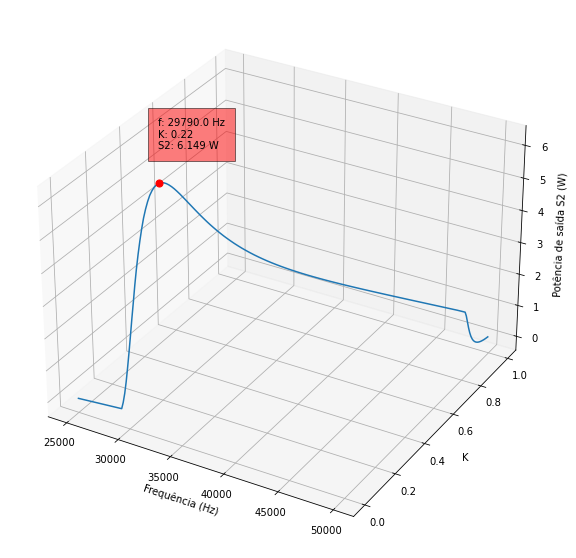

In [18]:
# Criando figura
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')

# Linha de plot3D
ax.plot3D(f_s2_list, k_s2_list, s2_max_list);
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('K')
ax.set_zlabel('Potência de saída S2 (W)');

# Encontrando valores do ponto de maior potência
max_s2 = max(s2_max_list)
index_max_s2 = s2_max_list.index(max_s2)
max_s2_f = f_s2_list[index_max_s2]
max_s2_k = k_s2_list[index_max_s2]

# PLotando gráficos
ax.scatter3D(max_s2_f, max_s2_k, max_s2, c="r", s=50);

# Textbox do ponto máx
ax.text(max_s2_f, max_s2_k, max_s2 + 1, f'f: {max_s2_f} Hz\nK: {max_s2_k}\nS2: {round(max_s2, 3)} W',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});